In [1]:
import pandas as pd

In [3]:
train = pd.read_csv(r'preprocessed_data\train_final_processed.csv')
test = pd.read_csv(r'preprocessed_data\test_final_processed.csv')

# 1. Checking for constant columns

In [4]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(train)

VarianceThreshold(threshold=0)

In [10]:
x_train = train.iloc[:, 2:]
y_train = train.iloc[:,1:2]



In [14]:
x_train

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense_scaled,Expense_encoded,Age_scaled,Group_id,Member_id,Name_Length,Group_members,Deck_fact,Cabin_side_fact,Cabin_Num
0,1,0,0,1,0,0,-0.732460,0.0,0.711687,1,1,15,1,1,0,0
1,0,0,0,1,0,0,-0.285081,1.0,-0.336766,2,1,12,1,5,1,0
2,1,0,0,1,0,1,2.831376,1.0,2.039727,3,1,13,2,0,1,0
3,1,0,0,1,0,0,2.413781,1.0,0.292306,3,2,12,2,0,1,0
4,0,0,0,1,0,0,-0.069294,1.0,-0.895940,4,1,17,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,1,2.831376,1.0,0.851481,9276,1,17,1,0,0,98
8689,0,0,1,0,1,0,-0.732460,0.0,-0.756147,9278,1,15,1,6,1,1499
8690,0,0,0,1,0,0,0.406046,1.0,-0.196972,9279,1,12,1,6,1,1500
8691,1,0,0,0,0,0,2.086149,1.0,0.222409,9280,1,16,2,4,1,608


# 2. Checking with correlations

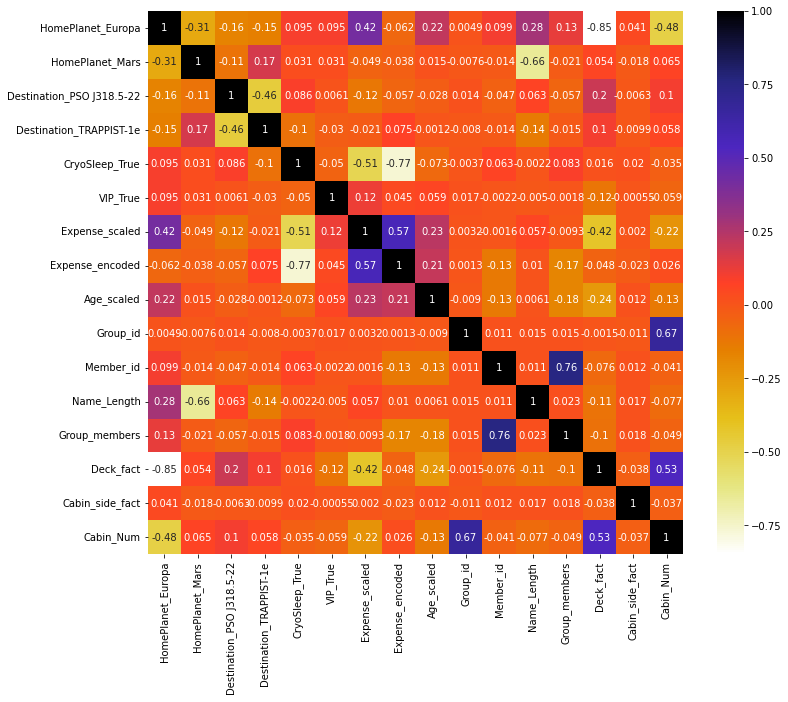

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))
corr_features

{'Deck_fact', 'Expense_encoded', 'Group_members'}

In [20]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense_scaled,Age_scaled,Group_id,Member_id,Name_Length,Cabin_side_fact,Cabin_Num
0,0,0,0,1,1,0,-0.710292,-0.117640,13,1,15,1,3
1,0,0,0,1,0,0,0.940590,-0.689732,18,1,14,1,4
2,1,0,0,0,1,0,-0.710292,0.168406,19,1,15,1,0
3,1,0,0,1,0,0,3.091049,0.668986,21,1,16,1,1
4,0,0,0,1,0,0,-0.334297,-0.618221,23,1,15,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,1,1,0,-0.710292,0.382940,9266,2,11,1,1496
4273,0,0,0,1,0,0,-0.116861,0.955032,9269,1,13,1,1498
4274,0,1,0,0,1,0,-0.710292,0.000936,9271,1,11,0,296
4275,1,0,1,0,0,0,1.156860,0.000936,9273,1,14,0,297


In [22]:
y_train

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [23]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.02459017, 0.00493607, 0.00073415, 0.00024743, 0.10485432,
       0.00365309, 0.12851079, 0.09149363, 0.01510877, 0.02207727,
       0.        , 0.        , 0.00879599, 0.0243268 , 0.00777872,
       0.02015457])

In [25]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Expense_scaled               0.128511
CryoSleep_True               0.104854
Expense_encoded              0.091494
HomePlanet_Europa            0.024590
Deck_fact                    0.024327
Group_id                     0.022077
Cabin_Num                    0.020155
Age_scaled                   0.015109
Group_members                0.008796
Cabin_side_fact              0.007779
HomePlanet_Mars              0.004936
VIP_True                     0.003653
Destination_PSO J318.5-22    0.000734
Destination_TRAPPIST-1e      0.000247
Member_id                    0.000000
Name_Length                  0.000000
dtype: float64

<AxesSubplot:>

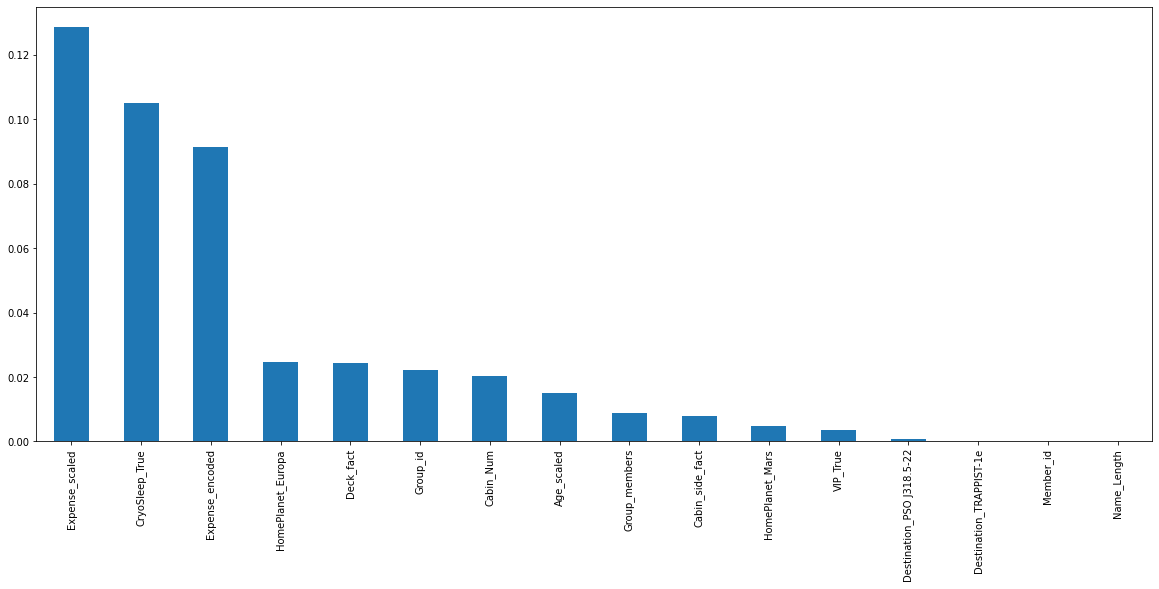

In [27]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]


c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['HomePlanet_Europa', 'Destination_TRAPPIST-1e', 'CryoSleep_True',
       'Expense_scaled', 'Expense_encoded', 'Group_id', 'Group_members',
       'Deck_fact', 'Cabin_side_fact', 'Cabin_Num'],
      dtype='object')

In [35]:
x_train.drop(['Member_id','Name_Length'], axis = 1)
x_test.drop(['Member_id','Name_Length'], axis = 1)

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense_scaled,Expense_encoded,Age_scaled,Group_id,Group_members,Deck_fact,Cabin_side_fact,Cabin_Num
0,0,0,0,1,1,0,-0.710292,0.0,-0.117640,13,1,6,1,3
1,0,0,0,1,0,0,0.940590,1.0,-0.689732,18,1,5,1,4
2,1,0,0,0,1,0,-0.710292,0.0,0.168406,19,1,2,1,0
3,1,0,0,1,0,0,3.091049,1.0,0.668986,21,1,2,1,1
4,0,0,0,1,0,0,-0.334297,1.0,-0.618221,23,1,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,1,1,0,-0.710292,0.0,0.382940,9266,2,6,1,1496
4273,0,0,0,1,0,0,-0.116861,1.0,0.955032,9269,1,6,1,1498
4274,0,1,0,0,1,0,-0.710292,0.0,0.000936,9271,1,3,0,296
4275,1,0,1,0,0,0,1.156860,1.0,0.000936,9273,1,3,0,297


In [39]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')